In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
d = pd.read_csv('./summary.csv')
d.head()

,run,step,train/loss,online_val/loss,online_val/physionet2019_score,online_val/average_precision,online_val/auroc,online_val/balanced_accuracy,validation/loss,validation/physionet2019_score,...,online_val/best_average_precision,online_val/best_auroc,online_val/best_balanced_accuracy,validation/best_loss,validation/best_physionet2019_score,validation/best_average_precision,validation/best_auroc,validation/best_balanced_accuracy,loss,epoch
0,pos_weight025/1,0,inf,inf,-inf,-inf,-inf,-inf,inf,-inf,...,-inf,-inf,-inf,inf,-inf,-inf,-inf,-inf,NaN,NaN
1,pos_weight025/1,99,0.941269,0.919724,0.244948,0.064544,0.773482,0.696913,NaN,NaN,...,0.064544,0.773482,0.696913,NaN,NaN,NaN,NaN,NaN,0.830469,0.0
2,pos_weight025/1,199,0.888742,0.894640,0.249487,0.070176,0.794155,0.710712,NaN,NaN,...,0.070176,0.794155,0.710712,NaN,NaN,NaN,NaN,NaN,0.889723,1.0
3,pos_weight025/1,299,0.866730,0.859138,0.290277,0.088665,0.812978,0.728648,NaN,NaN,...,0.088665,0.812978,0.728648,NaN,NaN,NaN,NaN,NaN,1.077263,2.0
4,pos_weight025/1,399,0.835787,0.827744,0.292015,0.100104,0.830307,0.752522,NaN,NaN,...,0.100104,0.830307,0.752522,NaN,NaN,NaN,NaN,NaN,0.585527,3.0


In [63]:
def is_best(colname):
    fragments = colname.split('/')
    if len(fragments) == 1:
        return False
    if fragments[1].startswith('best'):
        return True
    return False

d['repetition'] = d['run'].str.split('/').apply(lambda a: int(a[1]))
d['run'] = d['run'].str.split('/').apply(lambda a: a[0])
d['online_val/log_loss'] = np.log(d['online_val/loss'])
d = d[[col for col in d.columns if not is_best(col) and not col.startswith('validation')]]
d.head()

,run,step,train/loss,online_val/loss,online_val/physionet2019_score,online_val/average_precision,online_val/auroc,online_val/balanced_accuracy,loss,epoch,repetition,online_val/log_loss
0,pos_weight025,0,inf,inf,-inf,-inf,-inf,-inf,NaN,NaN,1,inf
1,pos_weight025,99,0.941269,0.919724,0.244948,0.064544,0.773482,0.696913,0.830469,0.0,1,-0.083682
2,pos_weight025,199,0.888742,0.894640,0.249487,0.070176,0.794155,0.710712,0.889723,1.0,1,-0.111333
3,pos_weight025,299,0.866730,0.859138,0.290277,0.088665,0.812978,0.728648,1.077263,2.0,1,-0.151826
4,pos_weight025,399,0.835787,0.827744,0.292015,0.100104,0.830307,0.752522,0.585527,3.0,1,-0.189052


In [64]:
d.groupby(['run', 'epoch']).std()

step  train/loss  online_val/loss  \
run           epoch                                           
pos_weight012 0.0    27.386128    0.000892         0.007673   
              1.0    27.386128    0.005203         0.005371   
              2.0    27.386128    0.004425         0.003294   
              3.0    27.386128    0.004087         0.018848   
              4.0    27.386128    0.003424         0.004611   
...                        ...         ...              ...   
pos_weight2   55.0   27.386128    0.079125         7.478479   
              56.0   27.386128    0.131190         4.056966   
              57.0   26.862082    0.273160         5.766438   
              58.0   27.571725    0.152432         7.885112   
              59.0   29.160476         NaN              NaN   

                     online_val/physionet2019_score  \
run           epoch                                   
pos_weight012 0.0                          0.018602   
              1.0                          0.003563   
              2.0                          0.019649   
              3.0                          0.001891   
              4.0                          0.003259   
...                                             ...   
pos_weight2   55.0                         0.092025   
              56.0                         0.095065   
              57.0                         0.039049   
              58.0                         0.002014   
              59.0                              NaN   

                     online_val/average_precision  online_val/auroc  \
run           epoch                                                   
pos_weight012 0.0                        0.002661          0.007288   
              1.0                        0.002173          0.005774   
              2.0                        0.007113          0.006527   
              3.0                        0.007276          0.002500   
              4.0                        0.003862          0.005391   
...                                           ...               ...   
pos_weight2   55.0                       0.004691          0.004013   
              56.0                       0.005218          0.024144   
              57.0                       0.010505          0.013257   
              58.0                       0.006164          0.000280   
              59.0                            NaN               NaN   

                     online_val/balanced_accuracy      loss  repetition  \
run           epoch                                                       
pos_weight012 0.0                        0.021157  0.075167    0.894427   
              1.0                        0.008283  0.123888    0.894427   
              2.0                        0.010900  0.126797    0.894427   
              3.0                        0.027352  0.232924    0.894427   
              4.0                        0.010797  0.179926    0.894427   
...                                           ...       ...         ...   
pos_weight2   55.0                       0.023660  0.330597    0.894427   
              56.0                       0.012747  0.168410    0.894427   
              57.0                       0.019974  0.359197    0.816497   
              58.0                       0.032189  0.123005    1.095445   
              59.0                            NaN  0.619004    0.000000   

                     online_val/log_loss  
run           epoch                       
pos_weight012 0.0               0.012601  
              1.0               0.009178  
              2.0               0.005522  
              3.0               0.032784  
              4.0               0.008291  
...                                  ...  
pos_weight2   55.0              0.450071  
              56.0              0.204404  
              57.0              0.286052  
              58.0              0.400410  
              59.0                   NaN  

[299 rows x 10 columns]

In [65]:
melted = d.melt(id_vars=['run', 'repetition', 'epoch'], value_vars=['train/loss','online_val/log_loss','online_val/physionet2019_score','online_val/average_precision','online_val/auroc','online_val/balanced_accuracy'])
melted.head()

,run,repetition,epoch,variable,value
0,pos_weight025,1,NaN,train/loss,inf
1,pos_weight025,1,0.0,train/loss,0.941269
2,pos_weight025,1,1.0,train/loss,0.888742
3,pos_weight025,1,2.0,train/loss,0.866730
4,pos_weight025,1,3.0,train/loss,0.835787


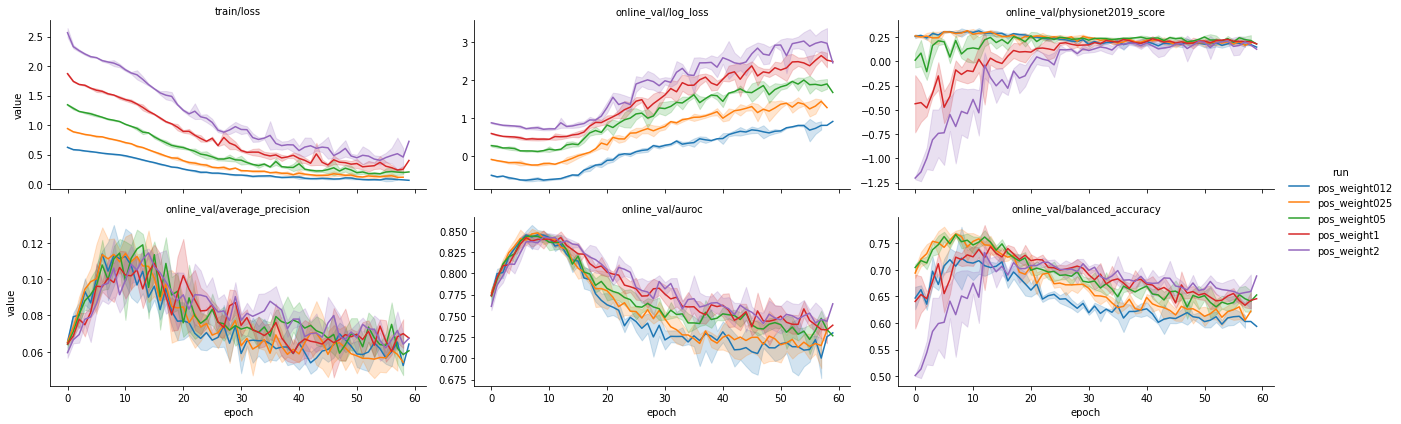

In [68]:
g = sns.FacetGrid(data=melted, col='variable', hue='run', col_wrap=3, hue_order=['pos_weight012', 'pos_weight025', 'pos_weight05', 'pos_weight1','pos_weight2'], sharey=False, aspect=2.)
g.map(sns.lineplot, 'epoch', 'value', ci='sd')
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.add_legend()

plt.savefig('visualization.pdf', bbox_inches='tight')
plt.savefig('visualization.png', dpi=300, bbox_inches='tight')